In [31]:
!pip install mlflow

In [32]:
import mlflow
mlflow.set_tracking_uri("http://18.117.193.162:5000/")

with mlflow.start_run():
  mlflow.log_param("param1", 5)
  mlflow.log_metric("f1", 0.68)

🏃 View run clumsy-auk-295 at: http://18.117.193.162:5000/#/experiments/486870012764298838/runs/da8e9f1e9e784f55a55ab5286cdd1658
🧪 View experiment at: http://18.117.193.162:5000/#/experiments/486870012764298838


In [33]:
import numpy as np
import pandas as pd


In [34]:
!pip install awscli

In [36]:
df = pd.read_csv('Reddit_Data.csv')
df.head()

,clean_comment,category
0,family mormon have never tried explain them t...,1
1,buddhism has very much lot compatible with chr...,1
2,seriously don say thing first all they won get...,-1
3,what you have learned yours and only yours wha...,0
4,for your own benefit you may want read living ...,1


In [37]:
df.dropna(inplace=True)

In [38]:
df.drop_duplicates(inplace=True)

In [39]:
df = df[~(df['clean_comment'].str.strip()=='')]

In [40]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [41]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [42]:
#Define the preprocessing function
def preprocess_commment(comment):
  #conver to lower case
  comment = comment.lower()

  #Remove trailing and leading whitespaces
  comment = comment.strip()

  #Remmove new line characters
  comment = re.sub(r'\n', ' ', comment)

  #Remove non-alphanumeric characters except punctuation
  comment = re.sub(r'[^A-Za-z0-9\s!?.,]', '', comment)

  #Remove stopwords but retain important ones for sentiment analysis
  stop_words = set(stopwords.words('english')) - {'not', 'but', 'however', 'no', 'yet', 'somehow', 'although', 'though'}
  comment = ' '.join([word for word in comment.split() if word not in stop_words])

  #Lemmatize the words
  lemmatizer = WordNetLemmatizer()
  comment = ' '.join([lemmatizer.lemmatize(word) for word in comment.split()])

  return comment

In [43]:
#Apply the preprocessing function to the 'clean_comment' column
df['clean_comment'] = df['clean_comment'].apply(preprocess_commment)

In [44]:
df.head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1


In [45]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_predict, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [46]:
#Step1 : Vectorize the comments using Bag of Words(CountVectorizer)
vectorizer = CountVectorizer(max_features=10000)

In [47]:
X=vectorizer.fit_transform(df['clean_comment']).toarray()
y = df['category']

In [48]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
X.shape

(36793, 10000)

In [50]:
y

,category
0,1
1,1
2,-1
3,0
4,1
...,...
37244,0
37245,1
37246,0
37247,1


In [51]:
#Step2: Setup the MLflow tracking server
mlflow.set_tracking_uri("http://18.117.193.162:5000/")

In [52]:
mlflow.set_experiment('RF Baseline Model')

<Experiment: artifact_location='s3://campusxalidvcbucket/486870012764298838', creation_time=1755785586786, experiment_id='486870012764298838', last_update_time=1755785586786, lifecycle_stage='active', name='RF Baseline Model', tags={}>

In [54]:
!pip install boto3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 3.0 MB/s eta 0:00:00


2025/08/21 15:50:28 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/21 15:50:38 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run RandomForest_Baseline_TrainTestSplit at: http://18.117.193.162:5000/#/experiments/486870012764298838/runs/f2bfc6f4f90344d3880be90bab807144
🧪 View experiment at: http://18.117.193.162:5000/#/experiments/486870012764298838
Accuracy: 0.6479141187661367


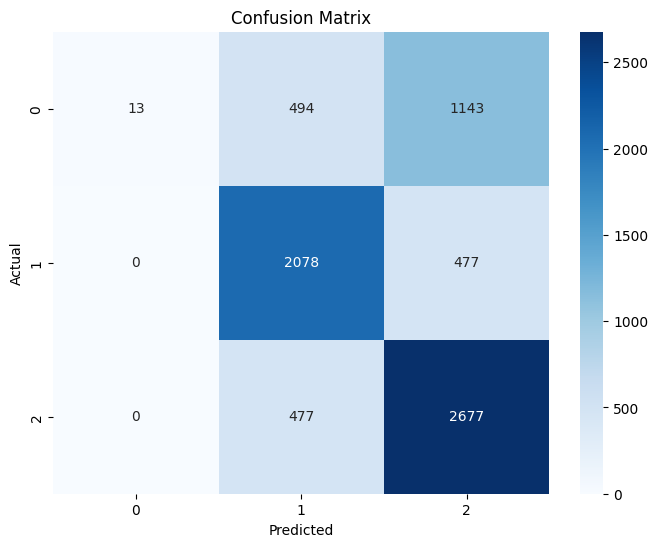

In [55]:
#Step1: Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42, stratify=y)

#Step2: Define and train a Random Forest Baseline model using a simple train-test split
with mlflow.start_run() as run:
  #Log description for the run
  mlflow.set_tag("mlflow.runName", "RandomForest_Baseline_TrainTestSplit")
  mlflow.set_tag("experiment_type", "baseline")
  mlflow.set_tag("model_type", "RandomForestClassifier")

  #Add a description
  mlflow.set_tag("description", "Baseline RandomForest model for sentiment analysis using Bag of words(BOW) with a simple train-test split")

  #Log parameters for the vectorizer
  mlflow.log_param("vectorizer_type", "CountVectorizer")
  mlflow.log_param("vectorizer_max_features", vectorizer.max_features)

  #Log Random Forest Parameters
  n_estimators = 200
  max_depth = 15

  mlflow.log_param("n_estimators", n_estimators)
  mlflow.log_param("max_depth", max_depth)

  #Initialize and train the model
  model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
  model.fit(X_train, y_train)

  #Make the prediction on the test set
  y_pred = model.predict(X_test)

  #Log metrics for each class and accuracy
  accuracy = accuracy_score(y_test, y_pred)
  mlflow.log_metric("accuracy", accuracy)

  classification_rep = classification_report(y_test, y_pred, output_dict=True)

  for label, metrics in classification_rep.items():
    if isinstance(metrics, dict):
      for metric, value in metrics.items():
        mlflow.log_metric(f"{label}_{metric}", value)


  #Confusion matrix plot
  conf_matrix = confusion_matrix(y_test, y_pred)
  plt.figure(figsize = (8,6))
  sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
  plt.xlabel("Predicted")
  plt.ylabel("Actual")
  plt.title("Confusion Matrix")

  #Save and log the confusioon matrix plot
  plt.savefig("confusion_matrix.png")
  mlflow.log_artifact("/content/confusion_matrix.png")

  #Log the model
  mlflow.sklearn.log_model(model, "model")

  #Optionally log the dataset itself
  df.to_csv("dataset.csv", index=False)
  mlflow.log_artifact("/content/dataset.csv")

#Display
print(f"Accuracy: {accuracy}")

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       1.00      0.01      0.02      1650
           0       0.68      0.81      0.74      2555
           1       0.62      0.85      0.72      3154

    accuracy                           0.65      7359
   macro avg       0.77      0.56      0.49      7359
weighted avg       0.73      0.65      0.57      7359



In [57]:
df.to_csv('reddit_preprocessing.csv', index=False)

In [58]:
pd.read_csv('reddit_preprocessing.csv').head()

,clean_comment,category
0,family mormon never tried explain still stare ...,1
1,buddhism much lot compatible christianity espe...,1
2,seriously say thing first get complex explain ...,-1
3,learned want teach different focus goal not wr...,0
4,benefit may want read living buddha living chr...,1
